In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'dummy-most_frequent',
  'Test Dataset': 'IPTC-test',
  'Macro F1': 0.006217923410975128,
  'Micro F1': 0.05580159433126661,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'hr': {'Macro F1': 0.006493506493506493,
    'Micro F1': 0.058419243986254296},
   'ca': {'Macro F1': 0.005861419300816412, 'Micro F1': 0.052434456928838954},
   'sl': {'Macro F1': 0.006688963210702341, 'Micro F1': 0.06028368794326241},
   'el': {'Macro F1': 0.005804953560371517, 'Micro F1': 0.05190311418685121}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'IPTC-test',
  'Macro F1': 0.06319414542550471,
  'Micro F1': 0.07263064658990256,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'hr': {'Macro F1': 0.05651180911098832,
    'Micro F1': 0.07216494845360824},
   'ca': {'Macro F1': 0.055563194742721714, 'Micro F1': 0.06367041198501873},
   'sl': {'Macro F1': 0.05266489526230521, 'Micro F1': 0.05319148936170213},
   'el': {'Macro F1': 0.0773111606

In [3]:
results_iptc = []

for x in results:
	cur_result = {}
	cur_result["Model"] = x["Model"]
	for lang in ["Slovenian", "Croatian"]:
		if lang == "Slovenian":
			lang_code = "sl"
		elif lang == ["Croatian"]:
			lang_code = "hr"
		cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang_code]["Macro F1"]
		cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang_code]["Micro F1"]
	results_iptc.append(cur_result)

results_df = pd.DataFrame(results_iptc)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
0,dummy-most_frequent,0.006689,0.060284,0.006689,0.060284
1,dummy-stratified,0.052665,0.053191,0.052665,0.053191
2,COMPLEMENTNB,0.210720,0.255319,0.210720,0.255319
3,SVC,0.421124,0.425532,0.421124,0.425532
4,deepseek-r1:14b,0.384765,0.361314,0.384765,0.361314
5,llama3.3:latest,0.614337,0.609626,0.614337,0.609626
6,gpt-3.5-turbo-0125,0.682264,0.670213,0.682264,0.670213
7,gpt-4o-2024-08-06,0.766934,0.765957,0.766934,0.765957
8,gpt-4o-mini-2024-07-18,0.730173,0.723404,0.730173,0.723404
9,IPTC XLM-R classifier,0.764784,0.758865,0.764784,0.758865


In [4]:
results_df = results_df.sort_values(by="Slovenian (macro-F1)", ascending=False).round(3)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
7,gpt-4o-2024-08-06,0.767,0.766,0.767,0.766
9,IPTC XLM-R classifier,0.765,0.759,0.765,0.759
11,gpt-5-mini-2025-08-07,0.749,0.741,0.749,0.741
13,gpt-5,0.736,0.727,0.736,0.727
8,gpt-4o-mini-2024-07-18,0.730,0.723,0.730,0.723
12,gpt-5-nano-2025-08-07,0.730,0.713,0.730,0.713
10,gemma3:27b,0.693,0.683,0.693,0.683
6,gpt-3.5-turbo-0125,0.682,0.670,0.682,0.670
5,llama3.3:latest,0.614,0.610,0.614,0.610
3,SVC,0.421,0.426,0.421,0.426


In [5]:
print(results_df.to_markdown())

|    | Model                  |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |
|---:|:-----------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|
|  7 | gpt-4o-2024-08-06      |                  0.767 |                  0.766 |                 0.767 |                 0.766 |
|  9 | IPTC XLM-R classifier  |                  0.765 |                  0.759 |                 0.765 |                 0.759 |
| 11 | gpt-5-mini-2025-08-07  |                  0.749 |                  0.741 |                 0.749 |                 0.741 |
| 13 | gpt-5                  |                  0.736 |                  0.727 |                 0.736 |                 0.727 |
|  8 | gpt-4o-mini-2024-07-18 |                  0.73  |                  0.723 |                 0.73  |                 0.723 |
| 12 | gpt-5-nano-2025-08-07  |                  0.73  |                  0.713 |         

In [6]:
# Save the results

results_df.to_json("results.json", orient="records", lines=True)


## Plot a bar plot

In [7]:
results_df = pd.read_json("results.json", orient="records", lines=True)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
0,gpt-4o-2024-08-06,0.767,0.766,0.767,0.766
1,IPTC XLM-R classifier,0.765,0.759,0.765,0.759
2,gpt-5-mini-2025-08-07,0.749,0.741,0.749,0.741
3,gpt-5,0.736,0.727,0.736,0.727
4,gpt-4o-mini-2024-07-18,0.730,0.723,0.730,0.723
5,gpt-5-nano-2025-08-07,0.730,0.713,0.730,0.713
6,gemma3:27b,0.693,0.683,0.693,0.683
7,gpt-3.5-turbo-0125,0.682,0.670,0.682,0.670
8,llama3.3:latest,0.614,0.610,0.614,0.610
9,SVC,0.421,0.426,0.421,0.426


In [8]:
# Drop certain models
results_df = results_df.drop(index=[12])

In [11]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy",
    "IPTC XLM-R classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
	"gpt-5-mini-2025-08-07": "GPT-5-mini",
	"gpt-5": "GPT-5",
	"gpt-5-nano-2025-08-07": "GPT-5-Nano"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)


In [12]:
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1)
0,GPT-4o,0.767,0.766,0.767,0.766
1,Fine-Tuned XLM-R,0.765,0.759,0.765,0.759
2,GPT-5-mini,0.749,0.741,0.749,0.741
3,GPT-5,0.736,0.727,0.736,0.727
4,GPT-4o-mini,0.730,0.723,0.730,0.723
5,GPT-5-Nano,0.730,0.713,0.730,0.713
6,Gemma 3,0.693,0.683,0.693,0.683
7,GPT-3.5-Turbo,0.682,0.670,0.682,0.670
8,LLaMA 3.3,0.614,0.610,0.614,0.610
9,Support Vector Machine,0.421,0.426,0.421,0.426


In [13]:
print(results_df.to_markdown(index=False))

| Model                  |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |
|:-----------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|
| GPT-4o                 |                  0.767 |                  0.766 |                 0.767 |                 0.766 |
| Fine-Tuned XLM-R       |                  0.765 |                  0.759 |                 0.765 |                 0.759 |
| GPT-5-mini             |                  0.749 |                  0.741 |                 0.749 |                 0.741 |
| GPT-5                  |                  0.736 |                  0.727 |                 0.736 |                 0.727 |
| GPT-4o-mini            |                  0.73  |                  0.723 |                 0.73  |                 0.723 |
| GPT-5-Nano             |                  0.73  |                  0.713 |                 0.73  |                 0.713 |


<module 'matplotlib.pyplot' from '/home/tajak/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

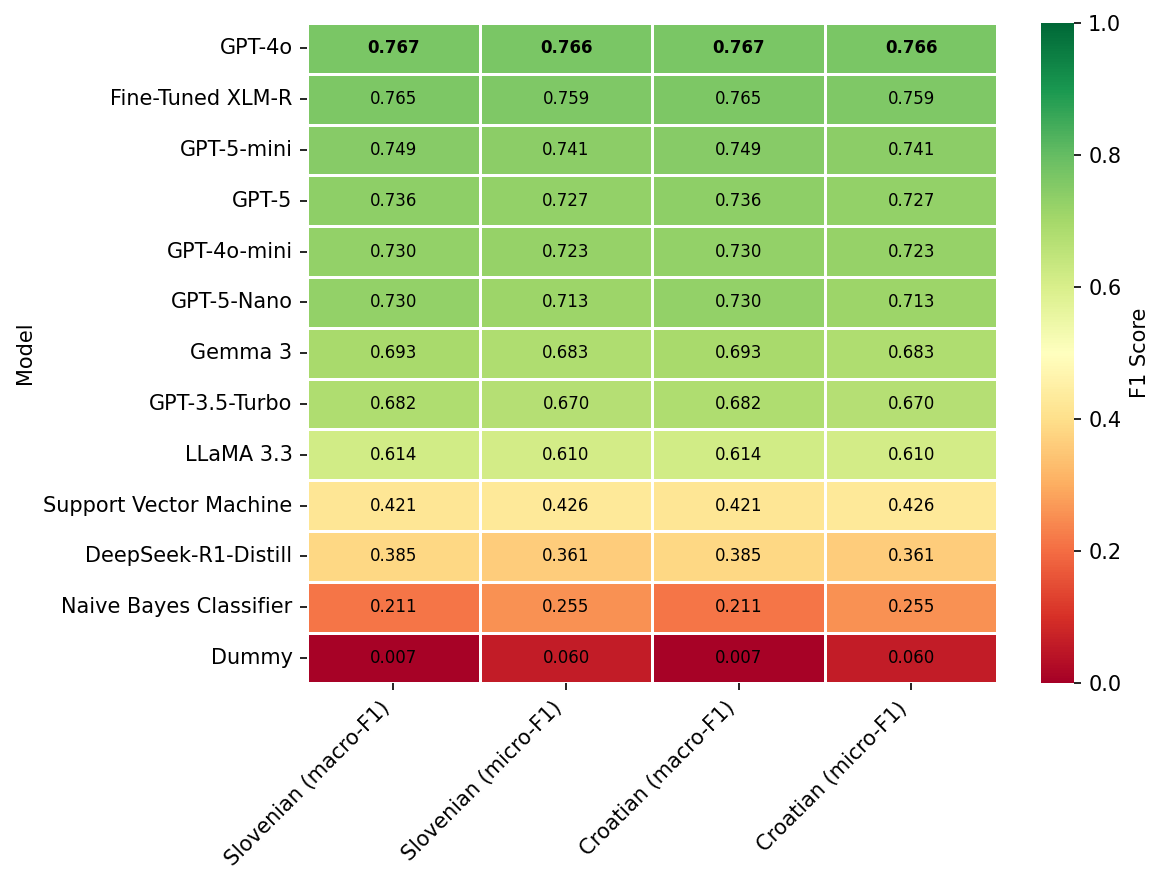

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=150)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Croatian (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt


## Analyze percentage of Mix labels

In [10]:
import os
import json
import pandas as pd

In [5]:
os.chdir("..")

In [17]:
submission_folder = "systems/OpenAI-GPT/submissions"

In [18]:
def add_predictions_to_dataset(results,dataset_name="IPTC-test"):
	"""The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
	"""
	# Load the test datasets from the GitHub repositories (access to them is obtained by request to the AGILE repository owner)

	test_df = pd.read_json("datasets/IPTC-top-test/IPTC-top-test.jsonl", lines=True)
	print(test_df.shape)

	test_df.rename(columns={"label": "labels", "lang": "language"}, inplace=True)

	# Extract predictions
	y_pred = results["predictions"][0]["predictions"]
	test_df["y_pred"] = y_pred

	return test_df

In [19]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

submission_files

['submission-gpt-3.5-turbo-0125-IPTC-test.json',
 'submission-gpt-4o-2024-08-06-IPTC-test.json',
 'submission-gpt-4o-mini-2024-07-18-IPTC-test.json']

In [20]:
# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)

		# Get information on the dataset and the model
		model = results["system"]

		dataset_name = results["predictions"][0]["test"]

		test_df = add_predictions_to_dataset(results)
			
		print(model)
		print(dataset_name)
		print(test_df["y_pred"].value_counts(normalize=True))

(1129, 5)
gpt-3.5-turbo-0125
IPTC-test
y_pred
disaster, accident and emergency incident    0.104517
lifestyle and leisure                        0.100974
economy, business and finance                0.069973
human interest                               0.069088
education                                    0.068202
politics                                     0.068202
environment                                  0.061116
arts, culture, entertainment and media       0.060230
sport                                        0.055802
science and technology                       0.054030
weather                                      0.049601
conflict, war and peace                      0.048716
health                                       0.042516
crime, law and justice                       0.041630
religion                                     0.038087
labour                                       0.035430
society                                      0.031887
Name: proportion, dtype: float64
(11